
=== TABELA RESUMO DAS INSTÂNCIAS ===
           Custo Total  Rodoviário  Ferroviário  Custo Fixo  Carrocerias  \
Instância                                                                  
A                 9645        2675         8850         395          400   
C                11200        2675         8850        1950          400   
B                12800        2675         8850        3550          400   

           Silos Ativados  
Instância                  
A                       4  
C                       4  
B                       4  

=== PARTICIPAÇÃO PERCENTUAL DOS CUSTOS (%) ===
           Rodoviário  Ferroviário  Custo Fixo  Carrocerias
Instância                                                  
A               27.73        91.76        4.10         4.15
C               23.88        79.02       17.41         3.57
B               20.90        69.14       27.73         3.12

=== COMPARAÇÃO RELATIVA (Base = Instância C) ===
           Diferença Absoluta (R$)  Diferen

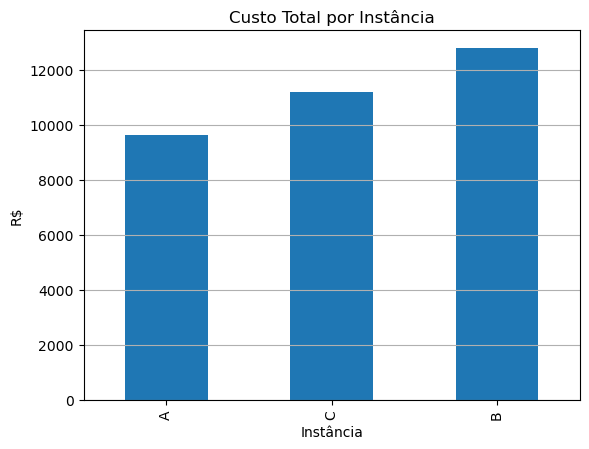

<Figure size 640x480 with 0 Axes>

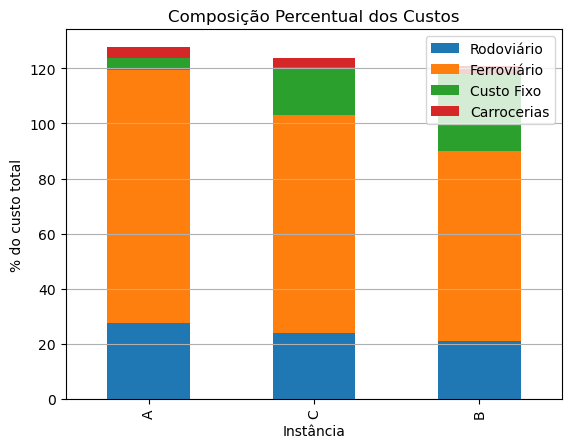


=== CONCLUSÕES ===
Instância mais barata: A
Instância mais cara: B
O custo ferroviário domina em todas as instâncias.
A diferença de custo total é explicada quase totalmente pelo custo fixo dos silos.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    "Instância": ["A", "C", "B"],
    "Custo Total": [9645, 11200, 12800],
    "Rodoviário": [2675, 2675, 2675],
    "Ferroviário": [8850, 8850, 8850],
    "Custo Fixo": [395, 1950, 3550],
    "Carrocerias": [400, 400, 400],
    "Silos Ativados": [4, 4, 4]
}

df = pd.DataFrame(data)
df.set_index("Instância", inplace=True)

print("\n=== TABELA RESUMO DAS INSTÂNCIAS ===")
print(df)

percentual = df[["Rodoviário", "Ferroviário", "Custo Fixo", "Carrocerias"]].div(
    df["Custo Total"], axis=0
) * 100

print("\n=== PARTICIPAÇÃO PERCENTUAL DOS CUSTOS (%) ===")
print(percentual.round(2))

base = df.loc["C"]
comparacao = df["Custo Total"] - base["Custo Total"]
comparacao_pct = (comparacao / base["Custo Total"]) * 100

comparativo = pd.DataFrame({
    "Diferença Absoluta (R$)": comparacao,
    "Diferença Relativa (%)": comparacao_pct
})

print("\n=== COMPARAÇÃO RELATIVA (Base = Instância C) ===")
print(comparativo.round(2))

plt.figure()
df["Custo Total"].plot(kind="bar")
plt.title("Custo Total por Instância")
plt.ylabel("R$")
plt.xlabel("Instância")
plt.grid(axis="y")
plt.show()

plt.figure()
percentual.plot(kind="bar", stacked=True)
plt.title("Composição Percentual dos Custos")
plt.ylabel("% do custo total")
plt.xlabel("Instância")
plt.legend(loc="upper right")
plt.grid(axis="y")
plt.show()

mais_barata = df["Custo Total"].idxmin()
mais_cara = df["Custo Total"].idxmax()

print("\n=== CONCLUSÕES ===")
print(f"Instância mais barata: {mais_barata}")
print(f"Instância mais cara: {mais_cara}")
print("O custo ferroviário domina em todas as instâncias.")
print("A diferença de custo total é explicada quase totalmente pelo custo fixo dos silos.")
